In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes_prediction_dataset.csv') 
print(data.head(10))
print("\nTotal null values=\n", data.isnull().sum())

'''data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])

print("\nModified dataset:\n",data[['age', 'age_group', 'bmi', 'bmi_category']].head())

categoricalFeatures = ['gender', 'smoking_history', 'age_group', 'bmi_category']
numericalFeatures = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numericalFeatures),
        ('cat', OneHotEncoder(), categoricalFeatures)
    ]
)

X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xtrainTransformed = preprocessor.fit_transform(X_train)
xtestTransformed = preprocessor.transform(X_test)

print("\nTraining Data:\n", xtestTransformed[:5])
print("\nTest Data:\n", xtrainTransformed[:5])

data.shape'''

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0            

'data[\'age_group\'] = pd.cut(data[\'age\'], bins=[0, 18, 35, 50, 100], labels=[\'0-18\', \'19-35\', \'36-50\', \'51+\'])\n\ndata[\'bmi_category\'] = pd.cut(data[\'bmi\'], bins=[0, 18.5, 24.9, 29.9, 100], labels=[\'underweight\', \'normal\', \'overweight\', \'obese\'])\n\nprint("\nModified dataset:\n",data[[\'age\', \'age_group\', \'bmi\', \'bmi_category\']].head())\n\ncategoricalFeatures = [\'gender\', \'smoking_history\', \'age_group\', \'bmi_category\']\nnumericalFeatures = [\'age\', \'bmi\', \'HbA1c_level\', \'blood_glucose_level\']\n\npreprocessor = ColumnTransformer(\n    transformers = [\n        (\'num\', StandardScaler(), numericalFeatures),\n        (\'cat\', OneHotEncoder(), categoricalFeatures)\n    ]\n)\n\nX = data.drop(\'diabetes\', axis=1)\ny = data[\'diabetes\']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nxtrainTransformed = preprocessor.fit_transform(X_train)\nxtestTransformed = preprocessor.transform(X_test)\n\nprint

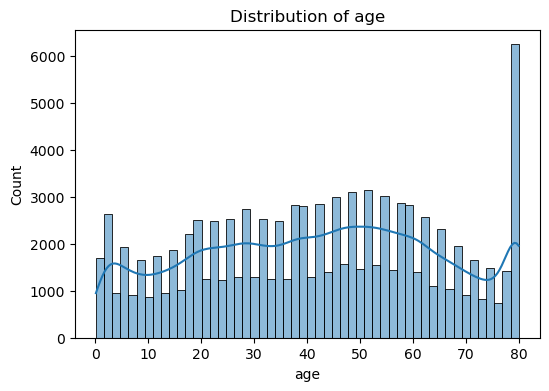

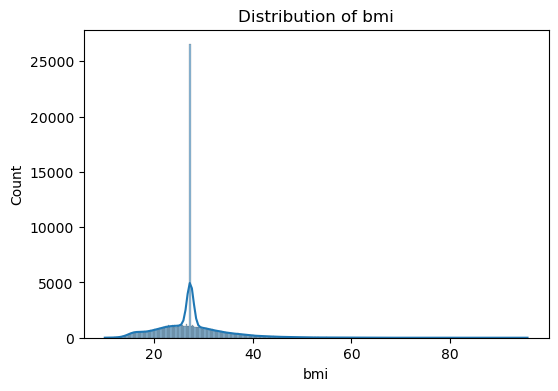

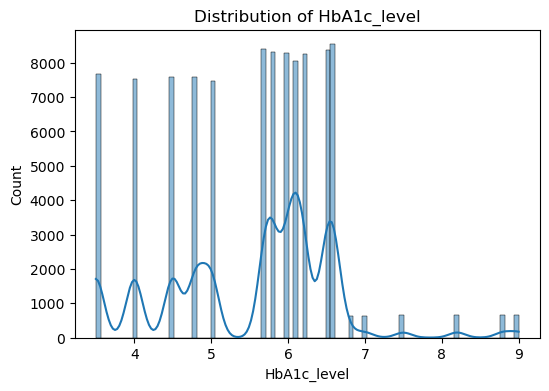

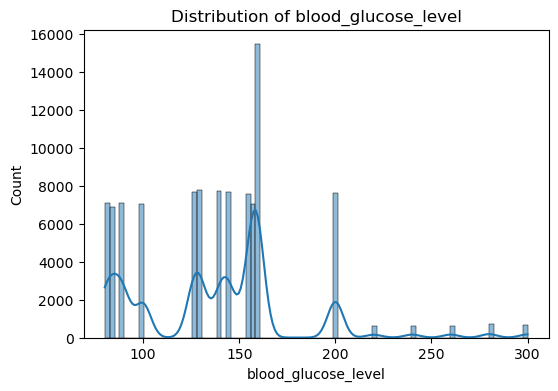

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(6,4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Outliers Detection and Capping for Age


In [5]:

print("Mean: ",data['age'].mean())
print("Std: ",data['age'].std())
print("Min value: ",data['age'].min())
print("Max value: ",data['age'].max())

upperLimit = print("Highest allowed",data['age'].mean() + 3*data['age'].std())
lowerLimit = print("Lowest allowed",data['age'].mean() - 3*data['age'].std())

data[(data['age'] > 109.43) | (data['age'] < -25.66)]

import numpy as np


data['age'] = np.where(
data['age'] > upperLimit,
upperLimit,
np.where(
data['age'] < lowerLimit,
lowerLimit,
data['age']
)
)

data.shape

Mean:  41.885856
Std:  22.51683987161513
Min value:  0.08
Max value:  80.0
Highest allowed 109.43637561484539
Lowest allowed -25.664663614845388


(100000, 9)

Outliers Detection and capping for HbA1c_level

In [6]:

print("Mean: ",data['HbA1c_level'].mean())
print("Std: ",data['HbA1c_level'].std())
print("Min value: ",data['HbA1c_level'].min())
print("Max value: ",data['HbA1c_level'].max())

upperLimit = print("Highest allowed",data['HbA1c_level'].mean() + 3*data['HbA1c_level'].std())
lowerLimit = print("Lowest allowed",data['HbA1c_level'].mean() - 3*data['HbA1c_level'].std())

data[(data['HbA1c_level'] > 8.73) | (data['HbA1c_level'] < -2.31)]

import numpy as np

data['HbA1c_level'] = np.where(
data['HbA1c_level'] > upperLimit,
upperLimit,
np.where(
data['HbA1c_level'] < lowerLimit,
lowerLimit,
data['HbA1c_level']
)
)

data.shape

Mean:  5.527507
Std:  1.0706720918832282
Min value:  3.5
Max value:  9.0
Highest allowed 8.739523275649685
Lowest allowed 2.3154907243503153


(100000, 9)

Outliers detection and capping for BMI

In [7]:

print("Mean: ",data['bmi'].mean())
print("Std: ",data['bmi'].std())
print("Min value: ",data['bmi'].min())
print("Max value: ",data['bmi'].max())

upperLimit = print("Highest allowed",data['bmi'].mean() + 3*data['bmi'].std())
lowerLimit = print("Lowest allowed",data['bmi'].mean() - 3*data['bmi'].std())






Mean:  27.3207671
Std:  6.636783416649581
Min value:  10.01
Max value:  95.69
Highest allowed 47.23111734994875
Lowest allowed 7.410416850051259


In [8]:
import numpy as np

data[(data['bmi'] > 47.23) | (data['bmi'] < 7.41)]

data['bmi'] = np.where(
data['bmi'] > upperLimit,
upperLimit,
np.where(
data['bmi'] < lowerLimit,
lowerLimit,
data['bmi']
)
)

data.shape

(100000, 9)

In [9]:

print("Mean: ",data['blood_glucose_level'].mean())
print("Mean: ",data['blood_glucose_level'].mean())
print("Std: ",data['blood_glucose_level'].std())
print("Min value: ",data['blood_glucose_level'].min())
print("Max value: ",data['blood_glucose_level'].max())

upperLimit = print("Highest allowed",data['blood_glucose_level'].mean() + 3*data['blood_glucose_level'].std())
lowerLimit = print("Lowest allowed",data['blood_glucose_level'].mean() - 3*data['blood_glucose_level'].std())






Mean:  138.05806
Mean:  138.05806
Std:  40.70813604870113
Min value:  80
Max value:  300
Highest allowed 260.18246814610336
Lowest allowed 15.933651853896635


In [10]:
import numpy as np

data[(data['blood_glucose_level'] > 260.18) | (data['blood_glucose_level'] < 15.93)]


data['blood_glucose_level'] = np.where(
data['blood_glucose_level'] > upperLimit,
upperLimit,
np.where(
data['blood_glucose_level'] < lowerLimit,
lowerLimit,
data['blood_glucose_level']
)
)

data.shape

(100000, 9)

In [11]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [12]:
print(data.head(10))

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

  HbA1c_level blood_glucose_level  diabetes  
0         6.6                 140         0  
1         6.6                  80         0  
2         5.7                 158         0  
3         5.0                 155 

In [13]:
'''import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset (assumed to be already loaded as 'data')
# target and features split
target = data['diabetes']
features = data.drop(columns=['diabetes'])

# Define categorical and numeric columns
categorical_cols = ['gender', 'smoking_history']
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform the features
transformed_features = preprocessor.fit_transform(features)

# Get the transformed feature names
num_feature_names = numeric_cols
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Create a DataFrame with transformed features
transformed_features_df = pd.DataFrame(transformed_features, columns=all_feature_names)

# Combine the features and the target
final_data = pd.concat([transformed_features_df, target.reset_index(drop=True)], axis=1)

# Define X and y for both models
X = final_data.drop(columns=['diabetes'])
y = final_data['diabetes']

# Split the data into training and testing sets for both models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Random Forest Model ------------------ #

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Random Forest Results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# ------------------ ANN Model (TensorFlow) ------------------ #

# Scale the data using StandardScaler for ANN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets for ANN
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train_scaled, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the ANN model
loss, accuracy = ann_model.evaluate(X_test_scaled, y_test_scaled)
print(f"ANN Model Accuracy: {accuracy:.4f}")

# Save the ANN model
ann_model.save('ann_model.h5')'''

Random Forest Accuracy: 0.97005
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

Epoch 1/20


c:\Users\Humna Khan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9406 - loss: 0.1705 - val_accuracy: 0.9612 - val_loss: 0.1134
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1122 - val_accuracy: 0.9654 - val_loss: 0.1020
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9670 - loss: 0.0979 - val_accuracy: 0.9686 - val_loss: 0.0957
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9696 - loss: 0.0917 - val_accuracy: 0.9697 - val_loss: 0.0924
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0882 - val_accuracy: 0.9688 - val_loss: 0.0908
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9709 - loss: 0.0862 - val_accuracy: 0.9700 - val_loss: 0.0893
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0854 - val_accuracy: 0.9707 - val_loss: 0.0880
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9714 - loss: 0.0837 - val_accurac

ANN Model Accuracy: 0.9715


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

# Assume 'diabetes' is the target and the rest are features
target = data['diabetes']
features = data.drop(columns=['diabetes'])

categorical_cols = ['gender', 'smoking_history']
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Preprocessing: Scale numerical features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features[numeric_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained RandomForest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the scaler for later use
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [16]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

target = data['diabetes']
features = data.drop(columns=['diabetes'])

categorical_cols = ['gender', 'smoking_history']
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Scale the data using StandardScaler
scaler_ann = StandardScaler()
features_scaled_ann = scaler_ann.fit_transform(features[numeric_cols])

X_train, X_test, y_train, y_test = train_test_split(features_scaled_ann, target, test_size=0.2, random_state=42)

# Define the ANN model
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Save the ANN model
ann_model.save('ann_model.h5')

# Save the scaler for ANN
with open('scaler_ann.pkl', 'wb') as f:
    pickle.dump(scaler_ann, f)


Epoch 1/20


c:\Users\Humna Khan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9457 - loss: 0.1692 - val_accuracy: 0.9670 - val_loss: 0.1003
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9674 - loss: 0.0962 - val_accuracy: 0.9680 - val_loss: 0.0940
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.0898 - val_accuracy: 0.9694 - val_loss: 0.0917
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9713 - loss: 0.0871 - val_accuracy: 0.9701 - val_loss: 0.0897
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9718 - loss: 0.0855 - val_accuracy: 0.9706 - val_loss: 0.0884
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0870 - val_accuracy: 0.9709 - val_loss: 0.0868
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9730 - loss: 0.0819 - val_accuracy: 0.9709 - val_loss: 0.0874
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9728 - loss: 0.0822 - val_accurac